## Tiền xử lý dữ liệu tập tin Automobile_data.csv
- Tập dữ liệu Automobile gồm các thông tin về xe của thập niên 80. Dữ liệu dùng để dự đoán giá xe (biến price)
- Đọc tập tin Automobile_data.csv và xem các thông tin cơ bản
### Yêu cầu:
- Kiểm tra dữ liệu bị trùng
- Kiểm tra dữ liệu bị thiếu
- Thay thế giá trị thiếu của biến price bằng price trung bình
- Chuyển đổi kiểu object của biến price sang kiểu float
- Thay thế giá trị thiếu của biến horsepower bằng horsepower trung bình
- Chuyển đổi kiểu object của biến horsepower sang kiểu float
- Thay thế dấu ? trong biến num-of-doors bằng mode của num-of-doors
- Biến price có outlier?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/Automobile_data.csv")

In [3]:
df.shape

(205, 26)

In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
# Biến price kiểu object?
# Biến horsepower kiểu object?
# Biến num-of-doors kiểu object?

In [7]:
# Tìm các dòng có price không phải là số
df.loc[df['price'].str.isnumeric()==False, 'price']

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [8]:
m = df.loc[df['price'].str.isnumeric()==True, 'price'].astype('float').mean()
m

13207.129353233831

In [9]:
# Thay bằng giá trị trung bình
df.loc[~df['price'].str.isnumeric(), 'price'] = m

In [10]:
# Đổi sang kiểu float
df['price'] = df['price'].astype('float')

In [11]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [12]:
# Tìm các dòng có horsepower không phải là số
df.loc[~df['horsepower'].str.isnumeric(), 'horsepower']

130    ?
131    ?
Name: horsepower, dtype: object

In [13]:
m = df.loc[df['horsepower'].str.isnumeric(), 'horsepower'].astype('float').mean()
m

104.25615763546799

In [14]:
# Thay bằng giá trị trung bình
df.loc[~df['horsepower'].str.isnumeric(), 'horsepower'] = m

In [15]:
df['horsepower'] = df['horsepower'].astype('float')

In [16]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [17]:
m = df['num-of-doors'].mode()[0]
m

'four'

In [18]:
# Thay ? bằng mode
df.loc[df['num-of-doors']=='?', 'num-of-doors'] = m

In [19]:
# Kiểm tra trùng
df.duplicated().any()

False

In [20]:
# Kiểm tra dữ liệu bị thiếu
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
df = df[['make', 'horsepower', 'height', 'width', 'price', 'num-of-doors', 'city-mpg', 'highway-mpg']]

In [22]:
df.head()

,make,horsepower,height,width,price,num-of-doors,city-mpg,highway-mpg
0,alfa-romero,111.0,48.8,64.1,13495.0,two,21,27
1,alfa-romero,111.0,48.8,64.1,16500.0,two,21,27
2,alfa-romero,154.0,52.4,65.5,16500.0,two,19,26
3,audi,102.0,54.3,66.2,13950.0,four,24,30
4,audi,115.0,54.3,66.4,17450.0,four,18,22


In [23]:
# biến phân loại: make, num-of-doors
# biến số: các biến còn lại

In [24]:
# xem hệ số tương quan giữa các biến số
df.corr()

,horsepower,height,width,price,city-mpg,highway-mpg
horsepower,1.000000,-0.110137,0.642195,0.757917,-0.803162,-0.770903
height,-0.110137,1.000000,0.279210,0.134388,-0.048640,-0.107358
width,0.642195,0.279210,1.000000,0.728699,-0.642704,-0.677218
price,0.757917,0.134388,0.728699,1.000000,-0.667449,-0.690526
city-mpg,-0.803162,-0.048640,-0.642704,-0.667449,1.000000,0.971337
highway-mpg,-0.770903,-0.107358,-0.677218,-0.690526,0.971337,1.000000


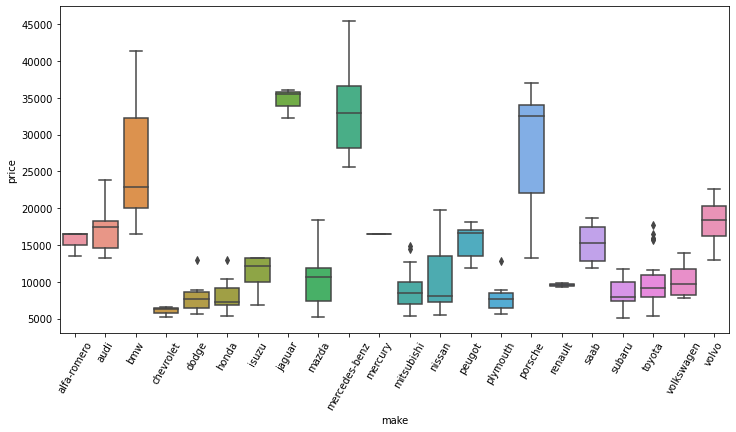

In [25]:
# vẽ biểu đồ để xem ảnh hưởng (tương quan) của make và price
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='make', y='price')
plt.xticks(rotation=60)
plt.show()

In [27]:
df.groupby('make')['price'].median().sort_values(ascending=False)

make
jaguar           35550.000000
mercedes-benz    32892.000000
porsche          32528.000000
bmw              22835.000000
volvo            18420.000000
audi             17450.000000
peugot           16630.000000
mercury          16503.000000
alfa-romero      16500.000000
saab             15275.000000
isuzu            12127.564677
mazda            10595.000000
volkswagen        9737.500000
renault           9595.000000
toyota            9103.000000
mitsubishi        8499.000000
nissan            8124.000000
subaru            7894.000000
dodge             7609.000000
plymouth          7609.000000
honda             7295.000000
chevrolet         6295.000000
Name: price, dtype: float64

In [28]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [29]:
df['make'].nunique()

22

In [30]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

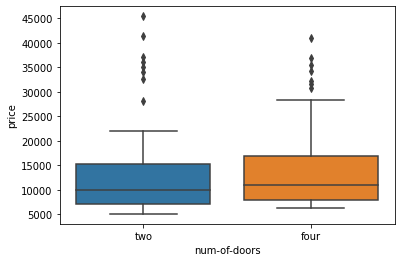

In [31]:
# vẽ biểu đồ để xem ảnh hưởng (tương quan) của num-of-doors và price
sns.boxplot(data=df, x='num-of-doors', y='price')
plt.show()

In [32]:
df['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

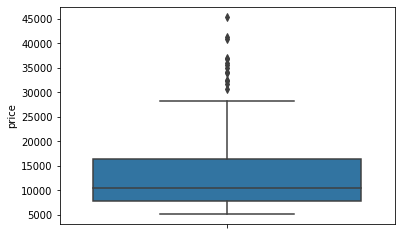

In [33]:
# Phát hiện các outlier của biến price
sns.boxplot(data=df, y='price')
plt.show()
# có nhiều outlier

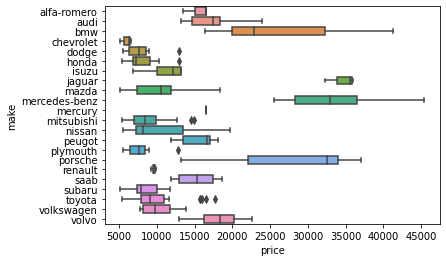

In [34]:
# Phát hiện các outlier của biến price trong mỗi hảng xe
sns.boxplot(data=df, y='make', x='price')
plt.show()
# có ít outlier

In [40]:
df.select_dtypes(include='number').columns

Index(['horsepower', 'height', 'width', 'price', 'city-mpg', 'highway-mpg'], dtype='object')